In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
mnist = keras.datasets.mnist
%time

Wall time: 0 ns


In [74]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [75]:
#print training data shape

print("training data: {}, {}".format(train_images.shape, train_labels.shape))

training data: (60000, 28, 28), (60000,)


In [76]:
#print test data shape


print("Testing data: {}, {}".format(test_images.shape, test_labels.shape))

Testing data: (10000, 28, 28), (10000,)


In [77]:
#labels

class_labels = np.unique(train_labels)

print("there are {}, number of classes and they are: {}".format(len(class_labels), class_labels))

there are 10, number of classes and they are: [0 1 2 3 4 5 6 7 8 9]


Wall time: 0 ns


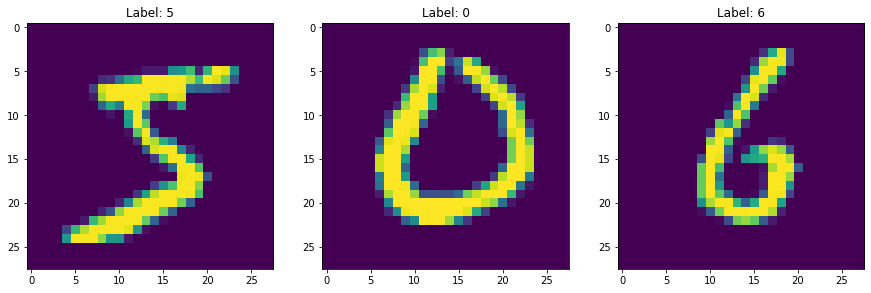

In [78]:
#lets view some of the images
%time
plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

plt.subplot(1, 3, 2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

plt.subplot(1, 3, 3)
plt.imshow(test_images[50])
plt.title("Label: {}".format(test_labels[50]))

plt.show()


In [79]:
#scaling the dataset, since the datasetbis in pixels, dividing by 255 will scale the dataset to a range of 0-1

train_images = train_images/255.0
test_images = test_images/255.0

In [80]:
#split training set to training and validation sets

X_train = train_images[:50000]
X_val = train_images[50000:]
y_train = train_labels[:50000]
y_val = train_labels[50000:]

In [81]:
#let's check the shape of the data
print("shape of X_train is {}".format(X_train.shape))
print("shape of X_val is {}".format(X_train.shape))
print("shape of y_train is {}".format(y_train.shape))
print("shape of y_val is {}".format(y_val.shape))

%time

shape of X_train is (50000, 28, 28)
shape of X_val is (50000, 28, 28)
shape of y_train is (50000,)
shape of y_val is (10000,)
Wall time: 0 ns


In [82]:
#reshape dataset from 28 * 28 matrix

new_dimension = np.prod(train_images.shape[1:])
X_train = X_train.reshape(X_train.shape[0], new_dimension)
X_val = X_val.reshape(X_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [83]:
#let's check the shape of the data after reshaping
print("shape of X_train is {}".format(X_train.shape))
print("shape of X_val is {}".format(X_train.shape))
print("shape of test_image is {}".format(test_images.shape))

%time

shape of X_train is (50000, 784)
shape of X_val is (50000, 784)
shape of test_image is (10000, 784)
Wall time: 0 ns


In [84]:
#encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

%time

Wall time: 0 ns


In [85]:
X_train.shape

(50000, 784)

# Lesson Two

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()




In [88]:
#create model structure
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))


In [95]:
#compile the model

model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [96]:
#train the model

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=1000)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 461us/sample - loss: 0.0148 - accuracy: 0.9966 - val_loss: 0.0829 - val_accuracy: 0.9781
Epoch 2/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.0094 - accuracy: 0.9986 - val_loss: 0.0831 - val_accuracy: 0.9781
Epoch 3/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.0086 - accuracy: 0.9986 - val_loss: 0.0811 - val_accuracy: 0.9776
Epoch 4/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.0067 - accuracy: 0.9989 - val_loss: 0.0795 - val_accuracy: 0.9787
Epoch 5/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0821 - val_accuracy: 0.9795
Epoch 6/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.0838 - val_accuracy: 0.9781
Epoch 7/20
50000/50000 [==============================

In [92]:
#evaluate model with test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

ValueError: You are passing a target array of shape (10000, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

Text(0.5, 1.0, 'Loss Curves - before regularisation')

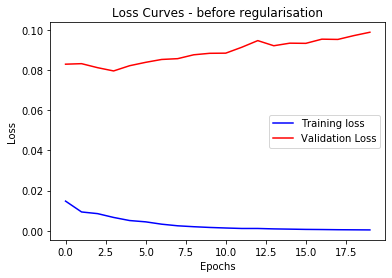

In [104]:
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [98]:
#overfitting identified, now we import dropout for regularization
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

In [100]:
#compile and train reg_model

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

reg_history = reg_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                            epochs=20, batch_size=1000)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 51us/sample - loss: 0.9979 - accuracy: 0.6830 - val_loss: 0.2940 - val_accuracy: 0.9193
Epoch 2/20
50000/50000 [==============================] - 2s 43us/sample - loss: 0.3856 - accuracy: 0.8855 - val_loss: 0.2038 - val_accuracy: 0.9411
Epoch 3/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.2885 - accuracy: 0.9141 - val_loss: 0.1628 - val_accuracy: 0.9541
Epoch 4/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2348 - accuracy: 0.9312 - val_loss: 0.1390 - val_accuracy: 0.9608
Epoch 5/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.2011 - accuracy: 0.9409 - val_loss: 0.1236 - val_accuracy: 0.9655
Epoch 6/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.1793 - accuracy: 0.9471 - val_loss: 0.1137 - val_accuracy: 0.9678
Epoch 7/20
50000/50000 [==============================] 

In [101]:
#evaluate reg_model
test_loss, test_accuracy = reg_model.evaluate(test_images, test_labels)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

ValueError: You are passing a target array of shape (10000, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

Text(0.5, 1.0, 'Loss Curves - after regularisation')

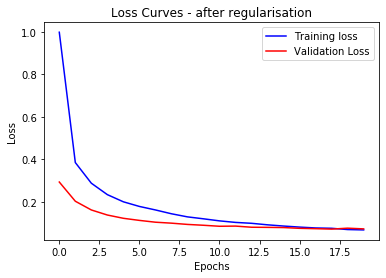

In [103]:
#check for overfitting
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

In [105]:
"big" > "small"

False

In [106]:
((10 >= 5*2) and (10 <= 5*2))

True

In [107]:
1/0

ZeroDivisionError: division by zero